### 필요한 패키지와 Data Set을 가져온다.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#데이터 셋 가져오기
titanic_df = pd.read_csv('train.csv')
#데이터 셋 제대로 되어 있는지 확인
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터가 어떤 형태로 되어있는지에 대해서 알아보기

데이터 셋에 문자열 자료형도 있기 때문에, 수치 해석(평균, 분산, 표준편차 등)을 나타내 주는 describe() 함수는 아직 사용하지 않았다.

In [32]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())
#Null 값이 어느 Column에 얼마나 있는지에 대해서 알아본다.


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


위의 자료들을 보면 Null 값이 'Age', 'Cabin', 'Embark'에 존재하는 것을 알 수 있다. 

이렇게 Null 값들이 있는 경우 값을 채울 수도 있고, Cabin 처럼 Null 값이 너무 많을 때에는 
해당 column을 drop 하는 것에 대해서도 고려를 해야 한다. 

In [33]:
#Null 값을 전부 채운다. 
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace= True)
titanic_df['Cabin'].fillna('N', inplace= True)
titanic_df['Embarked'].fillna('N', inplace= True)

# Null 값들이 잘 채워졌는지에 대해서 확인한다. 
print('해당 Column들의 Null 값 개수 ', titanic_df.isnull().sum())
print('전체 Null 값의 개수 ', titanic_df.isnull().sum().sum())

해당 Column들의 Null 값 개수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
전체 Null 값의 개수  0


titanic_df.isnull()로 하면 같은 shape의 DataFrame에서 해당 element가 null 값이라면 True를 반환하고,

null 값이 아니라면 False를 반환한다.

거기에 .sum()을 하면 해당 column 마다 null 값이 얼마나 있는지를 보여주는 표가 나타나게 되고,

한번더 .sum()을 하면 전체 null 값의 개수를 나타낸다.

### 문자형 데이터들 확인 

titanic_df.info()에서 Dtype이 object였던 것들 중 Name과 Ticket은 큰 의미를 찾을수 없으므로, 

이것들을 제외한 Sex, Cabin, Embarked에서 문자 자료형이 어떻게 되어있는지를 판단하기 위해 value_counts()를 이용한다.

In [34]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
F G63            1
B102             1
C87              1
A31              1
C32              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [35]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


'Cabin'은 뒤의 숫자는 큰 상관 없고, 앞의 대문자로 된 알파벳이 중요하다는 것을 알 수 있다. 

따라서 뒤의 숫자는 딱히 필요가 없으므로, 'Cabin'을 원래 데이터에서 앞의 한글자만 따오도록 한다.

In [36]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 남녀의 생존률 차이를 Seaborn 으로 나타내었다. 

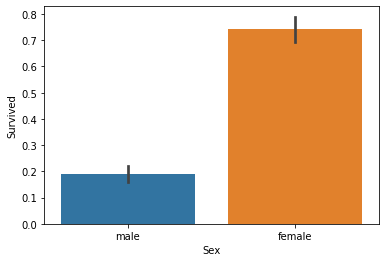

In [37]:
sns.barplot(x='Sex', y = 'Survived', data = titanic_df)

### 부의 차이에 따른 생존률을 알아보기 위해서는 객실 등급을 나타내는 'Pclass'를 이용해서 알아볼 수 있다. 

보조적으로 성별의 차이에 따른 생존률을 알아보기 위해서는 hue를 이용해서 그래프를 나타내는 것도 좋은 방법이다. 

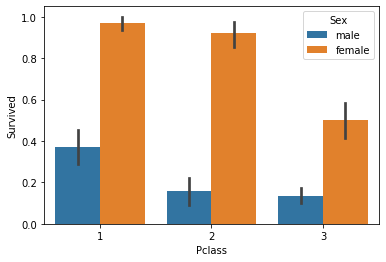

In [38]:
sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

위 그래프에서 알 수 있는 것은 

여성의 경우 1,2등실에 따른 생존 확률의 차이는 크지 않으나, 삼등식의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다. 

남성의 경우는 일등실의 생존 확률이 2,3 등실의 생존확률보다 월등히 높다는 것을 알수 있다.

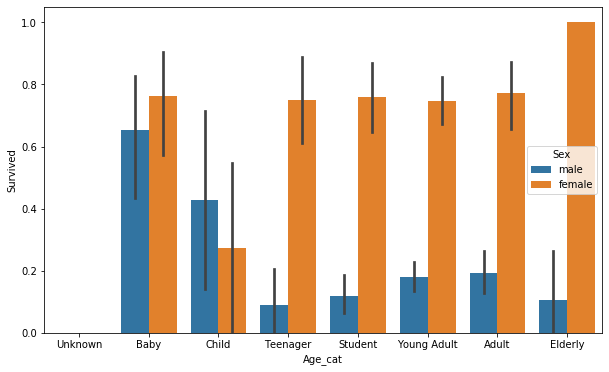

In [39]:
#입력 Age에 따라 구분 값을 반환하는 함수 설정 , DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age<= -1 : cat = 'Unknown'
    elif age<=5: cat = 'Baby'
    elif age<=12: cat = 'Child'
    elif age<=18: cat = 'Teenager'
    elif age<=25: cat = 'Student'
    elif age<=35: cat = 'Young Adult'
    elif age<=60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat


#막대 그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize = (10, 6))

# X 축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child','Teenager','Student','Young Adult','Adult','Elderly']

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정 
#get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x ='Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

### 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 : LabelEncoder 객체를 통해서!!

In [40]:
from sklearn import preprocessing 

def encode_features(dataDF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


위의 DataFrame을 보면 'Sex', 'Cabin', 'Embarked'가 숫자형 카테고리 값으로 변환이 된 것을 볼 수 있다. 

In [41]:
#Null 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace = True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df
    
#레이블 인코딩 수행 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


#앞에서 설정한 데이터 전처리 함수 호출 
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [43]:
from sklearn.preprocessing import LabelEncoder

#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성 
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


#RandomForest 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForest 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogirstRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7877
RandomForest 정확도 : 0.8547
LogirstRegression 정확도 : 0.8492


In [48]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    #폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성 .
    kfold = KFold(n_splits = folds)
    scores = []
    
    #KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


In [52]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


In [53]:
from sklearn.model_selection import GridSearchCV


parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)


print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator 로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTressClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTressClassifier 정확도 : 0.8715
